<a href="https://colab.research.google.com/github/zhengwen0425/NLP-Final-Project/blob/main/NLP_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
print(torch.cuda.is_available())

False


In [ ]:
!git clone https://github.com/gregdurrett/fp-dataset-artifacts.git

Cloning into 'fp-dataset-artifacts'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 41 (delta 9), reused 9 (delta 7), pack-reused 26 (from 1)
Receiving objects: 100% (41/41), 15.39 KiB | 2.20 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [ ]:
!git --version

git version 2.34.1


In [ ]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
%cd fp-dataset-artifacts

/content/fp-dataset-artifacts


In [ ]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 1.2 MB/s eta 0:00:00


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import datasets
print(datasets.__version__)

3.1.0


In [ ]:
!python run.py --do_train --task nli --dataset snli --output_dir ./trained_model/ --per_device_train_batch_size 96 --num_train_epochs 3 --max_length 128  --warmup_steps 500 --save_steps 10000


2024-11-19 03:35:00.545056: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-19 03:35:00.561465: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-19 03:35:00.582664: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-19 03:35:00.589147: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-19 03:35:00.604216: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
!python3 run.py --do_eval --task nli --dataset snli --model ./trained_model/ --output_dir ./eval_output/

2024-11-19 04:18:15.272420: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-19 04:18:15.289714: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-19 04:18:15.310953: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-19 04:18:15.317375: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-19 04:18:15.332676: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
#Analyze prediction
import json

with open('./eval_output/eval_predictions.jsonl', 'r') as f:
    predictions = [json.loads(line) for line in f]

for pred in predictions[:5]:  # Print the first 5 predictions
    print(pred)

{'premise': 'Two women are embracing while holding to go packages.', 'hypothesis': 'The sisters are hugging goodbye while holding to go packages after just eating lunch.', 'label': 1, 'predicted_scores': [-2.091831684112549, 3.822871208190918, -2.3352267742156982], 'predicted_label': 1}
{'premise': 'Two women are embracing while holding to go packages.', 'hypothesis': 'Two woman are holding packages.', 'label': 0, 'predicted_scores': [2.5363059043884277, -1.0886536836624146, -2.1622042655944824], 'predicted_label': 0}
{'premise': 'Two women are embracing while holding to go packages.', 'hypothesis': 'The men are fighting outside a deli.', 'label': 2, 'predicted_scores': [-3.5152721405029297, -2.279235363006592, 5.005756378173828], 'predicted_label': 2}
{'premise': 'Two young children in blue jerseys, one with the number 9 and one with the number 2 are standing on wooden steps in a bathroom and washing their hands in a sink.', 'hypothesis': 'Two kids in numbered jerseys wash their hands

In [ ]:
#Confusion Matrix: Generate a confusion matrix to visualize the distribution of true vs. predicted labels.

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

true_labels = [pred["label"] for pred in predictions]
pred_labels = [pred["predicted_label"] for pred in predictions]

print(confusion_matrix(true_labels, pred_labels))
print(classification_report(true_labels, pred_labels))


[[3029  233   67]
 [ 211 2803  221]
 [  69  233 2976]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3329
           1       0.86      0.87      0.86      3235
           2       0.91      0.91      0.91      3278

    accuracy                           0.89      9842
   macro avg       0.89      0.89      0.89      9842
weighted avg       0.90      0.89      0.90      9842



In [ ]:
#Error Analysis: Identify specific examples where the model performs poorly.

errors = [pred for pred in predictions if pred["label"] != pred["predicted_label"]]
print("Errors:", len(errors))
for error in errors[:5]:  # Show 5 examples
    print(error)


Errors: 1034
{'premise': 'A woman is doing a cartwheel while wearing a bikini in the sand next to the beach.', 'hypothesis': 'A woman is doing a cartwheel and falls on her head.', 'label': 2, 'predicted_scores': [-3.869244337081909, 2.44852876663208, 1.197392463684082], 'predicted_label': 1}
{'premise': 'Families waiting in line at an amusement park for their turn to ride.', 'hypothesis': 'People are waiting to see a movie.', 'label': 2, 'predicted_scores': [-3.6207289695739746, 2.5702390670776367, 0.8109203577041626], 'predicted_label': 1}
{'premise': 'At an outdoor event in an Asian-themed area, a crowd congregates as one person in a yellow Chinese dragon costume confronts the camera.', 'hypothesis': 'A crowd is dancing', 'label': 1, 'predicted_scores': [-2.5578510761260986, 0.7119212746620178, 1.7960774898529053], 'predicted_label': 2}
{'premise': 'At an outdoor event in an Asian-themed area, a crowd congregates as one person in a yellow Chinese dragon costume confronts the camera.'

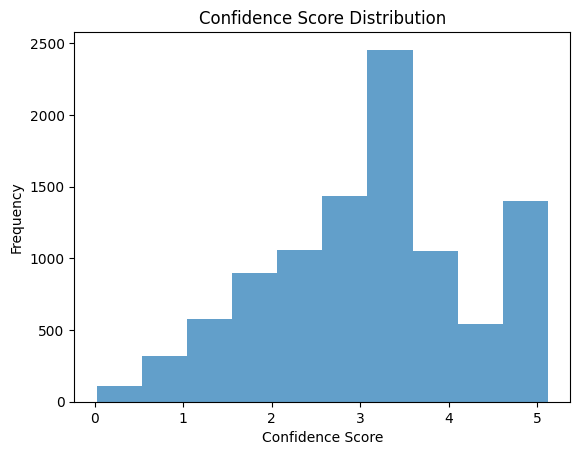

In [ ]:
import matplotlib.pyplot as plt

scores = [max(pred["predicted_scores"]) for pred in predictions]
plt.hist(scores, bins=10, alpha=0.7)
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.title('Confidence Score Distribution')
plt.show()


In [ ]:
import json

# Load the metrics
with open('./eval_output/eval_metrics.json', 'r') as f:
    metrics = json.load(f)

# Print metrics
for key, value in metrics.items():
    print(f"{key}: {value}")


eval_loss: 0.29635319113731384
eval_model_preparation_time: 0.0034
eval_accuracy: 0.8949400782585144
eval_runtime: 16.5807
eval_samples_per_second: 593.58
eval_steps_per_second: 74.243
